In [111]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading the data 
Admission = pd.read_csv (r'ML AHMED\Admission_Predict.csv')
Admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,D,4.5,4.5,9.65,Yes,0.92
1,2,324,107,D,4.0,4.5,8.87,Yes,0.76
2,3,316,104,C,3.0,3.5,8.00,Yes,0.72
3,4,322,110,C,3.5,2.5,8.67,Yes,0.80
4,5,314,103,B,2.0,3.0,8.21,No,0.65


In [3]:
Admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null object
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null object
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


In [4]:
Admission.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [5]:
Admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
Admission_data=Admission.drop(['Serial No.'],axis=1)

In [11]:
groups =Admission_data.groupby(Admission_data['University Rating'])
groups.mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
University Rating,,,,,,
A,303.153846,99.076923,1.884615,2.211538,7.745769,0.548077
B,309.177570,103.523364,2.705607,2.925234,8.183738,0.625981
C,315.954887,106.887218,3.364662,3.402256,8.552256,0.711880
D,324.824324,111.824324,4.108108,4.006757,9.021622,0.818108
E,328.333333,113.666667,4.500000,4.358333,9.291167,0.888167


In [40]:
# Trget prediction has to be bianry 

In [23]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()
Research=Admission_data['Research']
Research_Encoder=label_encoder.fit_transform(Research)
Research_Encoder[0:5]
# 1 is yes and 0 is No
Research_Encoder_df= pd.DataFrame(Research_Encoder,columns=['Research'])
Research_Encoder_df.head()

,Research
0,1
1,1
2,1
3,1
4,0


In [27]:
from sklearn.preprocessing import OneHotEncoder

University_Rating_encoder=Admission_data['University Rating']
Rating_Encoder=label_encoder.fit_transform(University_Rating_encoder)

binary_encoder= OneHotEncoder()
University_Rating=binary_encoder.fit_transform(Rating_Encoder.reshape(-1,1))
University_Rating_matrix=University_Rating.toarray()
University_Rating_df=pd.DataFrame(University_Rating_matrix, columns=['A','B','C','D','E'])
University_Rating_df.head()



,A,B,C,D,E
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [40]:
Admission_data.drop(['Research','University Rating'],axis=1,inplace=True)
Admission_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,337,118,4.5,4.5,9.65,0.92
1,324,107,4.0,4.5,8.87,0.76
2,316,104,3.0,3.5,8.00,0.72
3,322,110,3.5,2.5,8.67,0.80
4,314,103,2.0,3.0,8.21,0.65


In [114]:
Admission_final=pd.concat([Admission_data,University_Rating_df,Research_Encoder_df],axis=1, verify_integrity=True).astype(float)
Admission_final[0:5]


,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,A,B,C,D,E,Research
0,337.0,118.0,4.5,4.5,9.65,0.92,0.0,0.0,0.0,1.0,0.0,1.0
1,324.0,107.0,4.0,4.5,8.87,0.76,0.0,0.0,0.0,1.0,0.0,1.0
2,316.0,104.0,3.0,3.5,8.00,0.72,0.0,0.0,1.0,0.0,0.0,1.0
3,322.0,110.0,3.5,2.5,8.67,0.80,0.0,0.0,1.0,0.0,0.0,1.0
4,314.0,103.0,2.0,3.0,8.21,0.65,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
Admission_final.corr()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,A,B,C,D,E,Research
GRE Score,1.000000,0.835977,0.612831,0.557555,0.833060,0.802610,-0.314153,-0.402365,-0.052513,0.333312,0.422523,0.580391
TOEFL Score,0.835977,1.000000,0.657981,0.567721,0.828417,0.791594,-0.362448,-0.387455,-0.060867,0.346945,0.433580,0.489858
SOP,0.612831,0.657981,1.000000,0.729593,0.718144,0.675732,-0.397324,-0.417286,-0.024802,0.335488,0.459515,0.444029
LOR,0.557555,0.567721,0.729593,1.000000,0.670211,0.669889,-0.364624,-0.355079,-0.039518,0.294276,0.424054,0.396859
CGPA,0.833060,0.828417,0.718144,0.670211,1.000000,0.873289,-0.377699,-0.421277,-0.055306,0.338144,0.488270,0.521654
Chance of Admit,0.802610,0.791594,0.675732,0.669889,0.873289,1.000000,-0.326312,-0.417360,-0.061793,0.313626,0.483159,0.553202
A,-0.314153,-0.362448,-0.397324,-0.364624,-0.377699,-0.326312,1.000000,-0.159334,-0.186089,-0.125620,-0.110761,-0.188154
B,-0.402365,-0.387455,-0.417286,-0.355079,-0.421277,-0.417360,-0.159334,1.000000,-0.426509,-0.287916,-0.253860,-0.301626
C,-0.052513,-0.060867,-0.024802,-0.039518,-0.055306,-0.061793,-0.186089,-0.426509,1.000000,-0.336262,-0.296487,-0.019377
D,0.333312,0.346945,0.335488,0.294276,0.338144,0.313626,-0.125620,-0.287916,-0.336262,1.000000,-0.200144,0.239108


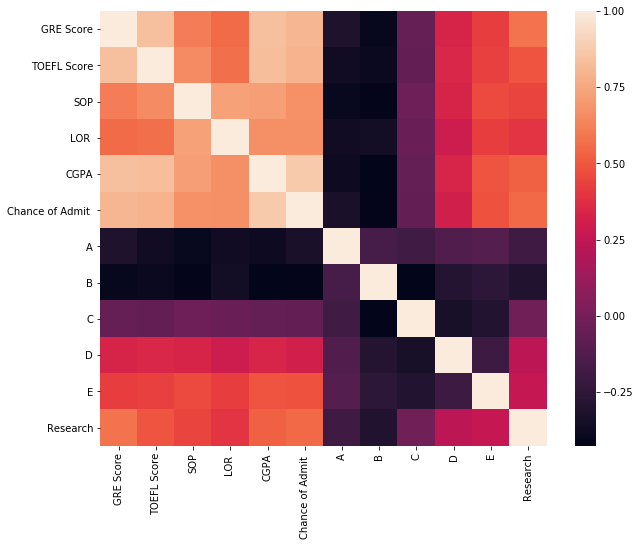

In [71]:
%matplotlib inline 
rcParams['figure.figsize']=10,8
sb.heatmap(Admission_final.corr())

In [128]:
Admission_final['Chance of Admit'] = Admission_final['Chance of Admit '].apply(lambda x: 1 if x >= 0.5 else 0)
Admission_final.drop(['Chance of Admit '], axis=1,inplace=True)
Admission_final.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,A,B,C,D,E,Research,Chance of Admit
0,337.0,118.0,4.5,4.5,9.65,0.0,0.0,0.0,1.0,0.0,1.0,1
1,324.0,107.0,4.0,4.5,8.87,0.0,0.0,0.0,1.0,0.0,1.0,1
2,316.0,104.0,3.0,3.5,8.00,0.0,0.0,1.0,0.0,0.0,1.0,1
3,322.0,110.0,3.5,2.5,8.67,0.0,0.0,1.0,0.0,0.0,1.0,1
4,314.0,103.0,2.0,3.0,8.21,0.0,1.0,0.0,0.0,0.0,0.0,1


In [129]:
X_train, X_test, y_train, y_test = train_test_split(Admission_final.drop('Chance of Admit', axis=1),
                                                   Admission_final['Chance of Admit'], test_size=0.2,
                                                   random_state=200)

In [131]:
print(X_train.shape)
print(y_train.shape)
X_train[0:5]

(320, 11)
(320,)


,GRE Score,TOEFL Score,SOP,LOR,CGPA,A,B,C,D,E,Research
120,335.0,117.0,5.0,5.0,9.56,0.0,0.0,0.0,0.0,1.0,1.0
62,304.0,105.0,3.0,3.0,8.20,0.0,1.0,0.0,0.0,0.0,1.0
4,314.0,103.0,2.0,3.0,8.21,0.0,1.0,0.0,0.0,0.0,0.0
203,334.0,120.0,4.0,5.0,9.87,0.0,0.0,0.0,0.0,1.0,1.0
290,307.0,105.0,2.5,3.0,7.65,0.0,1.0,0.0,0.0,0.0,0.0


In [132]:
LogReg= LogisticRegression(solver='liblinear')
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
y_predict= LogReg.predict(X_test)

In [135]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       1.00      0.14      0.25         7
          1       0.92      1.00      0.96        73

avg / total       0.93      0.93      0.90        80



In [137]:
y_train_pred= cross_val_predict(LogReg,X_train, y_train, cv=5)
confusion_matrix(y_train,y_train_pred)

array([[  2,  24],
       [  5, 289]], dtype=int64)

In [138]:
precision_score(y_train, y_train_pred)

0.92332268370607029

In [139]:
# Test 
Admission_final[200:201]

,GRE Score,TOEFL Score,SOP,LOR,CGPA,A,B,C,D,E,Research,Chance of Admit
200,317.0,103.0,2.5,3.0,8.54,0.0,0.0,1.0,0.0,0.0,1.0,1


In [140]:
test= np.array([317.0, 102.0, 2.5, 3.0, 8.54, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]).reshape(1,-1)
print(LogReg.predict(test))
print(LogReg.predict_proba(test))

[1]
[[ 0.05364386  0.94635614]]
